!pip install PySastrawi
!pip install gensim
!pip install pyLDAvis==2.1.2

In [112]:
import re
import string
from requests_html import HTMLSession
import requests
import json
import spacy
from langdetect import detect
from bs4 import BeautifulSoup
import requests
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from spacy_langdetect import LanguageDetector
from textblob import TextBlob

In [113]:
import pyLDAvis.gensim_models
import random
import time
import string
import nltk
import nest_asyncio
import itertools
import gensim
import urllib.request
import pyLDAvis
#import pyLDAvis.gensim

from textblob import TextBlob as tb
from collections import Counter
from Sastrawi.StopWordRemover.StopWordRemoverFactory import StopWordRemoverFactory
#from keras.preprocessing.text import Tokenizer
#from keras.preprocessing.sequence import pad_sequences
from sklearn import svm
from sklearn.metrics import classification_report, confusion_matrix
from sklearn.metrics import precision_score, recall_score, f1_score, accuracy_score
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import TfidfVectorizer
from gensim import corpora, models
from gensim.models import Phrases
from gensim.models.coherencemodel import CoherenceModel
from gensim.models.ldamodel import LdaModel
from gensim.corpora.dictionary import Dictionary
#from wordcloud import WordCloud
from itertools import chain

nest_asyncio.apply()
nltk.download('punkt')
nltk.download('stopwords')

from nltk.corpus import stopwords

[nltk_data] Downloading package punkt to
[nltk_data]     C:\Users\Asus\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\Asus\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


# Web Scraping

## Tiket.com

In [114]:
tiket = ['https://en.tiket.com/hotel/indonesia/solaris-hotel-kutabali-108001534490296439', 
'https://en.tiket.com/hotel/indonesia/ubud-tropical-garden-108001534490384763',
'https://en.tiket.com/hotel/indonesia/the-calna-villa-bali-401001610004627782',
'https://en.tiket.com/hotel/indonesia/the-rooms-and-apartment-204001556125239608',
'https://en.tiket.com/hotel/indonesia/frii-bali-echo-beach-108001534490306464',
'https://en.tiket.com/hotel/indonesia/zuri-express-jimbaran-bali-108001534490374249',
'https://www.tiket.com/hotel/indonesia/the-kemilau-hotel-villa-canggu-112001544423973633',
'https://www.tiket.com/hotel/indonesia/grand-livio-kuta-hotel-112001545304329549',
'https://www.tiket.com/hotel/indonesia/the-tusita-hotel-bali-108001534490287042',
'https://www.tiket.com/hotel/indonesia/alron-hotel-108001534490291747',
'https://www.tiket.com/hotel/indonesia/koa-d-surfer-hotel-108001534490325036', 
'https://tiket.com/hotel/indonesia/stark-boutique-hotel-and-spa-bali-310001603347369602',
'https://tiket.com/hotel/indonesia/berry-biz-hotel-108001534517474955',
'https://tiket.com/hotel/indonesia/rivavi-kuta-beach-hotel-108001534490282159',
'https://tiket.com/hotel/indonesia/kuta-majesty-hotel-408001627898435323',
'https://tiket.com/hotel/indonesia/the-aromas-of-bali-hotel-108001534490284735',
'https://tiket.com/hotel/indonesia/hardys-rofa-hotel-and-spa-legian-112001545304299288',
'https://tiket.com/hotel/indonesia/hadi-poetra-hotel-108001534490313627',
'https://tiket.com/hotel/indonesia/pop-hotel-legian-dewi-sri-108001534490317203',
'https://tiket.com/hotel/indonesia/kamandhani-cottage-108001534490296859',
'https://tiket.com/hotel/indonesia/maharani-beach-hotel-108001534490356210']

In [115]:
review_dict = {'name':[], 'date':[], 'rating':[], 'review':[], 'source':[]}

In [116]:
user_agent = {'User-agent': 'Mozilla/5.0'} #cek user agent di http://httpbin.org/get

In [117]:
for i in tiket:
    response = requests.get(i, headers = user_agent)
    soup = BeautifulSoup(response.text, 'html.parser')
    full_tiket = soup.find_all('div', class_='review-card-full')
    for i in full_tiket:
        review_dict['rating'].append((i.find('div', class_='score').text)[:3])
        review_dict['date'].append(' '.join(map(str, (i.find('div', class_='date ellipsis').text.split()[:3]))))
        review_dict['name'].append(i.find('div', class_='name ellipsis').text)
        review_dict['review'].append(i.find('div', class_='review-content').text)
        review_dict['source'].append('Tiket.com')

# remove duplicates
temp = []
res = dict()
for key, val in review_dict.items():
    if val not in temp:
        temp.append(val)
        res[key] = val

reviews = soup.find_all('div', class_='review-content')
for review in reviews:
    review_dict['review'].append(review.text)

ratings = soup.find_all('div', class_='score')
for rating in ratings:
    review_dict['rating'].append(rating.text)
dates = soup.find_all('div', class_='date ellipsis')
for date in dates:
    review_dict['date'].append(' '.join(map(str, date.text.split()[0:3])))
names = soup.find_all('div', class_='name ellipsis')
for name in names:
    review_dict['name'].append(name.text)
soup.find_all('div', class_='name ellipsis')
for name in names:
    review_dict['name'].append(name.text)

## Traveloka

In [118]:
traveloka = ['https://www.traveloka.com/id-id/hotel/indonesia/the-rooms-apartment-bali-9000000097391', 
'https://www.traveloka.com/id-id/hotel/indonesia/quest-san-hotel-denpasar-by-aston-1000000531091',
'https://www.traveloka.com/id-id/hotel/indonesia/cozy-stay-hotel-denpasar-bali-401285',
'https://www.traveloka.com/id-id/hotel/indonesia/grandmas-plus-hotel-seminyak-267812',
'https://www.traveloka.com/id-id/hotel/indonesia/golden-tulip-essential-denpasar-45774300000'
'https://www.traveloka.com/id-id/hotel/indonesia/tapa-tepi-kali-canggu-by-pramana-3000020005879',
'https://www.traveloka.com/id-id/hotel/indonesia/natya-hotel-kuta-564597',
'https://www.traveloka.com/id-id/hotel/indonesia/sunrise-suite-bali-3000020014403',
'https://www.traveloka.com/id-id/hotel/indonesia/hotel-neo-denpasar-by-aston-1000000468579',
'https://www.traveloka.com/id-id/hotel/indonesia/fame-hotel-sunset-road-kuta-bali-3000010010252',
'https://www.traveloka.com/id-id/hotel/indonesia/the-alea-hotel-seminyak-1000000468606',
'https://www.traveloka.com/id-id/hotel/indonesia/hadi-poetra-hotel-1000000506300',
'https://www.traveloka.com/id-id/hotel/indonesia/kyriad-royal-seminyak-bali-570231',
'https://www.traveloka.com/id-id/hotel/indonesia/rofa-kuta-hotel-3000010000249',
'https://www.traveloka.com/id-id/hotel/indonesia/grand-lifestyle-hotel-2000000369564',
'https://www.traveloka.com/id-id/hotel/indonesia/j-hotel-kuta-430943',
'https://www.traveloka.com/id-id/hotel/indonesia/rivavi-kuta-beach-hotel-294612',
'https://www.traveloka.com/id-id/hotel/indonesia/cara-cara-inn-3000010042972',
'https://www.traveloka.com/id-id/hotel/indonesia/choice-stay-hotel-denpasar-3000010004607',
'https://www.traveloka.com/id-id/hotel/indonesia/signature-seminyak-smart-hotel-by-digitels-3000010017665',
'https://www.traveloka.com/id-id/hotel/indonesia/ibis-styles-bali-denpasar-281496']

In [119]:
for i in traveloka:
    response = requests.get(i, headers = user_agent)
    soup = BeautifulSoup(response.text, 'html.parser')
    full_tiket = soup.find_all('div', class_='_2K0Zb _278Mz')
    for i in full_tiket:
        review_dict['rating'].append(i.find('div', class_='css-901oao r-1i6uqv8 r-1sixt3s r-ubezar r-majxgm r-135wba7 r-fdjqy7').text)
        review_dict['date'].append(i.find('div', class_='css-1dbjc4n r-18u37iz').text)
        review_dict['name'].append(i.find('div', class_='css-901oao r-1sixt3s r-1inkyih r-b88u0q r-135wba7 r-fdjqy7').text)
        review_dict['review'].append(i.find('div', class_='css-901oao r-1sixt3s r-ubezar r-majxgm r-135wba7 r-fdjqy7').text)
        review_dict['source'].append('Traveloka')

## Pegipegi

pegi = ['https://www.pegipegi.com/hotel/bali/boss_legian_hotel_bali_950647/', 'https://www.pegipegi.com/hotel/bali/liberta_seminyak_hotel_967128/',
'https://www.pegipegi.com/hotel/bali/l_amore_hotel_seminyak_943056/', 'https://www.pegipegi.com/hotel/bali/ubud_tropical_garden_995622/',
'https://www.pegipegi.com/hotel/bali/canggu_dream_village_964201/', 'https://www.pegipegi.com/hotel/bali/baliez_hotel_seminyak_bali_999739/',
'https://www.pegipegi.com/hotel/bali/the_legian_sunset_residence_bali_955913/', '']

for i in pegi:
   session = HTMLSession()
    response = session.get(i, headers = user_agent)
    soup = BeautifulSoup(response.text, 'html.parser')
    full_tiket = soup.find_all('div', class_='columReview')
    for i in full_tiket:
        print(i.find('div', itemprop='ratingValue').text)
        print(i.find('div', itemprop='datePublished').text)
        print(i.find('span', itemprop='author'))
        print(i.find('div', class_="contentComment"))

for i in pegi:
    session = HTMLSession()
    response = session.get(i, headers = user_agent)
    soup = BeautifulSoup(response.text, 'html.parser')
    full_tiket = soup.find_all('div', class_='columReview')
    for i in full_tiket:
        review_dict['rating'].append(i.find('div', class_='point').text)
        review_dict['date'].append(i.find('div', class_='date').time.text)
        review_dict['name'].append(i.find('div', class_='detailUserReview').span.text)
        review_dict['review'].append(i.find('div', class_='contentComment').text)

In [120]:
df = pd.DataFrame(review_dict)

In [121]:
df

,name,date,rating,review,source
0,Yanuar Charisma,21 Apr 2021,5.0,"- staff ramah ☺️\n- kamar luas, sangat nyaman ...",Tiket.com
1,AP,14 Apr 2021,1.8,Staff nya sangat tidak ramah. Kartu pintu saya...,Tiket.com
2,IR,05 Jun 2021,5.0,Good choice for staying in Bali,Tiket.com
3,PR,12 Jun 2021,5.0,"Lokasinya strategis, kamarnya juga bagus, bers...",Tiket.com
4,Indah Marini Sitio,02 Jun 2021,5.0,"Gilasih, kamarnya murah banget tapi pelayanan ...",Tiket.com
...,...,...,...,...,...
395,Ajeng R. C. D. S. P. A.,21 Feb 2020,9.0,Sejauh ini menginap 14 hari hotel ibis style s...,Traveloka
396,Annabella R. W.,18 Feb 2020,8.5,"Bangunan tua, fasilitasnya sudah kuno, shower ...",Traveloka
397,Marfiansyah M.,08 Feb 2020,8.4,"Harganya oke, kamarnya lumayan kecil, sarapan ...",Traveloka
398,Harnawan,06 Feb 2020,6.0,"Toilet bau, AC bermasalah",Traveloka


In [122]:
df.dtypes

name      object
date      object
rating    object
review    object
source    object
dtype: object

In [123]:
df['rating'].iloc[153] = df['rating'].iloc[153][:1]

In [124]:
df['rating'].iloc[153]

'0'

In [125]:
df['rating'] = df['rating'].apply(lambda x: x.replace(',', '.'))

In [126]:
df['rating'] = pd.to_numeric(df['rating'])

# Booking.com

booking = ['https://www.booking.com/hotel/id/grandmashotels-ngurah-rai.id.html?aid=356980;label=gog235jc-1DCAMYygEoaEIEa3V0YUgSWANoaIgBAZgBErgBF8gBDNgBA-gBAfgBAogCAagCA7gC8p2hiQbAAgHSAiRiM2U2NjRiOC1mOWE0LTRmZWQtOWRjZi0yNmYzODNhNzQxNjPYAgTgAgE;sid=ac5c31331c530e7ab270dbcb4de38b1f#tab-reviews']
for i in booking:
    response = requests.get(i, headers = user_agent)
    soup = BeautifulSoup(response.text, 'html.parser')
    full_tiket = soup.find_all('div', class_='bui-grid')
    for i in full_tiket:
        print(i.find('div', class_='bui-review-score__badge').text)
        print(i.find('div', class_='c-review-block__date'))
        print(i.find('div', class_='bui-avatar-block__text'))
        print(i.find('div', class_='c-review__body', lang='id'))

agoda = ['https://www.agoda.com/astagina-resort-villa-and-spa/hotel/bali-id.html?finalPriceView=1&isShowMobileAppPrice=false&cid=1844104&numberOfBedrooms=&familyMode=false&adults=1&children=0&rooms=1&maxRooms=0&checkIn=2021-09-5&isCalendarCallout=false&childAges=&numberOfGuest=0&missingChildAges=false&travellerType=-1&showReviewSubmissionEntry=false&currencyCode=IDR&isFreeOccSearch=false&tspTypes=16,8&los=1&searchrequestid=ba1a866f-d207-4b13-b59b-7d8166b52b5b'
]
for i in agoda:
    response = requests.get(i, headers = user_agent)
    soup = BeautifulSoup(response.text, 'html.parser')
    full_tiket = soup.find_all('div', class_='Review-comment')
    for i in full_tiket:
        print(i.find('div', class_='Review-comment-leftScore').strong.text)
        print(i.find('div', class_='Review-statusBar-date ').text)
        print(i.find('div', class_='Review-comment-reviewer').text)
        print(i.find('div', class_='Review-comment-bodyText', lang='id').text)

# Topic Modelling

In [127]:
def det_lang(text):
    lang = TextBlob(text)
    return lang.detect_language()
# coba
det_lang('Halo perkenalkan nama saya Zika')

'id'

In [128]:
# remove numbers
def remove_numbers(text):
  pattern = r'[^a-zA-z.,!?/:;\"\'\s]' 
  return re.sub(pattern, '', text)

# remove punctuation
def remove_punctuation(text):
  for punctuation in string.punctuation:
    text = text.replace(punctuation, '')
  return text

# remove symbol
def remove_symbol(text):
  return re.sub("[^0-9a-zA-Z]+", ' ', text)

# case folding
def to_lower(text):
  return text.lower()

def preprocessLang(text):
  a = remove_numbers(text)
  b = remove_punctuation(a)
  c = remove_symbol(b)
  d = to_lower(c)
  return d

In [129]:
# df['language'] = [det_lang(row) for row in df['review'] if len(row) > 2]

In [130]:
df['cleansed'] = df['review'].apply(preprocessLang)

In [131]:
df

,name,date,rating,review,source,cleansed
0,Yanuar Charisma,21 Apr 2021,5.0,"- staff ramah ☺️\n- kamar luas, sangat nyaman ...",Tiket.com,staff ramah kamar luas sangat nyaman dan sang...
1,AP,14 Apr 2021,1.8,Staff nya sangat tidak ramah. Kartu pintu saya...,Tiket.com,staff nya sangat tidak ramah kartu pintu saya ...
2,IR,05 Jun 2021,5.0,Good choice for staying in Bali,Tiket.com,good choice for staying in bali
3,PR,12 Jun 2021,5.0,"Lokasinya strategis, kamarnya juga bagus, bers...",Tiket.com,lokasinya strategis kamarnya juga bagus bersih...
4,Indah Marini Sitio,02 Jun 2021,5.0,"Gilasih, kamarnya murah banget tapi pelayanan ...",Tiket.com,gilasih kamarnya murah banget tapi pelayanan a...
...,...,...,...,...,...,...
395,Ajeng R. C. D. S. P. A.,21 Feb 2020,9.0,Sejauh ini menginap 14 hari hotel ibis style s...,Traveloka,sejauh ini menginap hari hotel ibis style sete...
396,Annabella R. W.,18 Feb 2020,8.5,"Bangunan tua, fasilitasnya sudah kuno, shower ...",Traveloka,bangunan tua fasilitasnya sudah kuno shower he...
397,Marfiansyah M.,08 Feb 2020,8.4,"Harganya oke, kamarnya lumayan kecil, sarapan ...",Traveloka,harganya oke kamarnya lumayan kecil sarapan ti...
398,Harnawan,06 Feb 2020,6.0,"Toilet bau, AC bermasalah",Traveloka,toilet bau ac bermasalah


In [132]:
# tokenization
daftar_kata = []

for cleansed_review in df['cleansed']:
  kata = cleansed_review.split()
  daftar_kata = daftar_kata + kata

Counter(daftar_kata).most_common()

[('dan', 252),
 ('kamar', 235),
 ('di', 201),
 ('hotel', 150),
 ('tidak', 134),
 ('ada', 131),
 ('yang', 127),
 ('saya', 119),
 ('sangat', 100),
 ('bersih', 98),
 ('nya', 94),
 ('ramah', 81),
 ('dengan', 76),
 ('nyaman', 67),
 ('bagus', 65),
 ('untuk', 64),
 ('ke', 63),
 ('yg', 61),
 ('juga', 56),
 ('kurang', 50),
 ('ini', 49),
 ('menginap', 48),
 ('karena', 48),
 ('lokasi', 47),
 ('strategis', 46),
 ('pelayanan', 46),
 ('tapi', 44),
 ('baik', 42),
 ('harga', 40),
 ('staff', 39),
 ('lagi', 39),
 ('jadi', 38),
 ('air', 37),
 ('tempat', 37),
 ('banget', 35),
 ('dekat', 34),
 ('kotor', 34),
 ('kamarnya', 32),
 ('mandi', 32),
 ('dari', 31),
 ('mau', 31),
 ('bisa', 31),
 ('sudah', 31),
 ('in', 30),
 ('sini', 30),
 ('the', 30),
 ('saja', 29),
 ('ga', 28),
 ('kolam', 28),
 ('sekali', 27),
 ('hanya', 27),
 ('and', 26),
 ('good', 26),
 ('agak', 25),
 ('bali', 25),
 ('sama', 25),
 ('gak', 25),
 ('ac', 24),
 ('seperti', 24),
 ('lumayan', 24),
 ('bau', 24),
 ('cuma', 24),
 ('luas', 23),
 ('enak', 

In [133]:
# Normalisasi Text

normalized_word = {'singkatan': ['jd', 'bs', 'utk', 'tp', 'dlm','bbrp', 'ga', 'gak', 'tpi', 'tdk', 'krn', 'sdh', 'dr'],
                   'arti': ['jadi', 'bisa', 'untuk', 'tapi', 'dalam', 'beberapa', 'tidak','tidak', 'tapi', 'tidak', 'karena',
                   'sudah', 'dari']}
normalized_word_dict = {}

for index, row in normalized_word.items():
    if row[0] not in normalized_word_dict:
        normalized_word_dict[row[0]] = row[1] 

def normalized_term(document):
    return [normalizad_word_dict[term] if term in normalizad_word_dict else term for term in document]

def normalize(text):
    words_list = text.split(' ')
    normalized_text = ''
    for word in words_list :
        if word in normalized_word_dict :
          normalized_text = normalized_text + ' ' + normalized_word_dict[ word ]
        else :
          normalized_text = normalized_text + ' '+ word    
    return normalized_text

df['normalized_cleansed'] = df['cleansed'].apply(lambda row : normalize(row))

In [134]:
# menghilangkan adjectives, stop words, dan kata2 lain selain kata benda untuk meningkatkan topics semantic coherence

def remove_stopword(text):
  stop_english = stopwords.words('english')
  stop_indonesian = StopWordRemoverFactory().get_stop_words()
  stop_custom_topic = ['yg', 'aja', 'banget', 'ok', 'ga', 'good', 'lumayan', 'bagus', 'suka', 'kaki', 'stay', 'proses', 'susah', 'utk', 'dgn', 'deh',
  'pas', 'bali', 'memuaskan', 'bs', 'super', 'sayang', 'kuta','canggu', 'puas', 'tidur', 'buruk', 'nginep', 'cari', 'sih', 'banget', 'senang', 
  'mantap', 'gak', 'check', 'kota', 'udah','pokoknya', 'overall', 'pindah', 'menyenangkan', 'front', 'office','krn', 'nyaman', 'foto', 'bandara', 
  'berfungsi', 'kecewa', 'tdk','memuaskan', 'terimakasih', 'pusat', 'menginap', 'tolong','senang', 'bersahabat', 'terima kasih'] 
  stop = stop_english + stop_indonesian + stop_custom_topic
  return ' '.join([word for word in text.split() if word not in (stop)])

df['normalized_topic'] = df['normalized_cleansed'].apply(remove_stopword)

In [135]:
df

,name,date,rating,review,source,cleansed,normalized_cleansed,normalized_topic
0,Yanuar Charisma,21 Apr 2021,5.0,"- staff ramah ☺️\n- kamar luas, sangat nyaman ...",Tiket.com,staff ramah kamar luas sangat nyaman dan sang...,staff ramah kamar luas sangat nyaman dan san...,staff ramah kamar luas bersih channel tv lengk...
1,AP,14 Apr 2021,1.8,Staff nya sangat tidak ramah. Kartu pintu saya...,Tiket.com,staff nya sangat tidak ramah kartu pintu saya ...,staff nya sangat tidak ramah kartu pintu saya...,staff ramah kartu pintu rusak pelayanan staff ...
2,IR,05 Jun 2021,5.0,Good choice for staying in Bali,Tiket.com,good choice for staying in bali,good choice for staying in bali,choice staying
3,PR,12 Jun 2021,5.0,"Lokasinya strategis, kamarnya juga bagus, bers...",Tiket.com,lokasinya strategis kamarnya juga bagus bersih...,lokasinya strategis kamarnya juga bagus bersi...,lokasinya strategis kamarnya bersih harga terj...
4,Indah Marini Sitio,02 Jun 2021,5.0,"Gilasih, kamarnya murah banget tapi pelayanan ...",Tiket.com,gilasih kamarnya murah banget tapi pelayanan a...,gilasih kamarnya murah banget tapi pelayanan ...,gilasih kamarnya murah pelayanan ajib kamar be...
...,...,...,...,...,...,...,...,...
395,Ajeng R. C. D. S. P. A.,21 Feb 2020,9.0,Sejauh ini menginap 14 hari hotel ibis style s...,Traveloka,sejauh ini menginap hari hotel ibis style sete...,sejauh ini menginap hari hotel ibis style set...,hotel ibis style berita kejadian amanaman cepa...
396,Annabella R. W.,18 Feb 2020,8.5,"Bangunan tua, fasilitasnya sudah kuno, shower ...",Traveloka,bangunan tua fasilitasnya sudah kuno shower he...,bangunan tua fasilitasnya sudah kuno shower h...,bangunan tua fasilitasnya kuno shower head rus...
397,Marfiansyah M.,08 Feb 2020,8.4,"Harganya oke, kamarnya lumayan kecil, sarapan ...",Traveloka,harganya oke kamarnya lumayan kecil sarapan ti...,harganya oke kamarnya lumayan kecil sarapan t...,harganya oke kamarnya sarapan varian order egg...
398,Harnawan,06 Feb 2020,6.0,"Toilet bau, AC bermasalah",Traveloka,toilet bau ac bermasalah,toilet bau ac bermasalah,toilet bau ac bermasalah


In [136]:
text = df['normalized_topic']

text_list =  [i.split() for i in text]

print(len(text_list))
print(text_list)

400
[['staff', 'ramah', 'kamar', 'luas', 'bersih', 'channel', 'tv', 'lengkap', 'jernih', 'review', 'lift', 'air', 'panas', 'nyala', 'everything', 'works', 'really', 'fine', 'lift', 'air', 'panas', 'sarapan', 'bikin', 'kenyang', 'lokasi', 'strategis', 'warung', 'mini', 'market', 'hotel', 'tinggal', 'jalan', 'pantai', 'jerman', 'tinggal', 'jalan', 'bentar', 'pantai', 'ac', 'dingin', 'amenities', 'kamar', 'lengkap', 'kurangnya', 'bgd', 'solaris'], ['staff', 'ramah', 'kartu', 'pintu', 'rusak', 'pelayanan', 'staff', 'ramah', 'asik', 'duduk', 'fokus', 'liat', 'komputer', 'mas', 'cowok', 'kurus', 'admin', 'kacau', 'pelayanan'], ['choice', 'staying'], ['lokasinya', 'strategis', 'kamarnya', 'bersih', 'harga', 'terjangkauu', 'dibawah', 'rb', 'sdh', 'pemanas', 'kulkas', 'hairdryer', 'air', 'hangat', 'top', 'pelayanan', 'jg', 'thankyouuu'], ['gilasih', 'kamarnya', 'murah', 'pelayanan', 'ajib', 'kamar', 'bersih', 'toilet', 'kinclong', 'kolam', 'berenang', 'bersih', 'ac', 'dingin', 'sampe', 'eksten'

In [137]:
bigram = Phrases(text_list, min_count=10)
trigram = Phrases(bigram[text_list])
for idx in range(len(text_list)):
    for token in bigram[text_list[idx]]:
        if '_' in token:
            text_list[idx].append(token)
    for token in trigram[text_list[idx]]:
        if '_' in token:
            text_list[idx].append(token)

In [138]:
dictionary = corpora.Dictionary(text_list)
dictionary.filter_extremes(no_below=5, no_above=0.2) 
print(dictionary)

doc_term_matrix = [dictionary.doc2bow(doc) for doc in text_list]
print(len(doc_term_matrix))
print(doc_term_matrix[100])
tfidf = models.TfidfModel(doc_term_matrix) #build TF-IDF model
corpus_tfidf = tfidf[doc_term_matrix]

Dictionary(147 unique tokens: ['ac', 'ac_dingin', 'air', 'air_panas', 'channel']...)
400
[(113, 1)]


In [139]:
def compute_coherence_values(dictionary, corpus, texts, limit, start, step):
    coherence_values = []
    model_list = []
    for num_topics in range(start, limit, step):
        model = LdaModel(corpus=corpus, id2word=dictionary, num_topics=num_topics, iterations=10000)
        model_list.append(model)
        coherencemodel = CoherenceModel(model=model, texts=texts, dictionary=dictionary, coherence='c_v')
        coherence_values.append(coherencemodel.get_coherence())
    return model_list, coherence_values

In [140]:
start = 1
limit = 21
step = 1
model_list, coherence_values = compute_coherence_values(dictionary, corpus_tfidf, 
                                                        text_list, limit, start, step)
x = range(start, limit, step)

In [141]:
for m, cv in zip(x, coherence_values):
    print("Num Topics =", m, " has Coherence Value of", round(cv, 6))

Num Topics = 1  has Coherence Value of 0.262541
Num Topics = 2  has Coherence Value of 0.336015
Num Topics = 3  has Coherence Value of 0.390036
Num Topics = 4  has Coherence Value of 0.398358
Num Topics = 5  has Coherence Value of 0.42287
Num Topics = 6  has Coherence Value of 0.438721
Num Topics = 7  has Coherence Value of 0.445756
Num Topics = 8  has Coherence Value of 0.404324
Num Topics = 9  has Coherence Value of 0.401451
Num Topics = 10  has Coherence Value of 0.429244
Num Topics = 11  has Coherence Value of 0.41442
Num Topics = 12  has Coherence Value of 0.416327
Num Topics = 13  has Coherence Value of 0.407208
Num Topics = 14  has Coherence Value of 0.423391
Num Topics = 15  has Coherence Value of 0.418243
Num Topics = 16  has Coherence Value of 0.41392
Num Topics = 17  has Coherence Value of 0.424048
Num Topics = 18  has Coherence Value of 0.418823
Num Topics = 19  has Coherence Value of 0.425784
Num Topics = 20  has Coherence Value of 0.423749


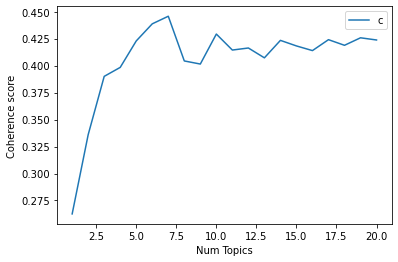

In [142]:
x = range(start, limit, step)
plt.plot(x, coherence_values)
plt.xlabel("Num Topics")
plt.ylabel("Coherence score")
plt.legend(("coherence_values"), loc='best')
plt.show()

In [143]:
model = LdaModel(corpus=corpus_tfidf, id2word=dictionary, num_topics=8, random_state=42) 
for idx, topic in model.print_topics(-1):
    print('Topic: {} Word: {}\n'.format(idx, topic))

Topic: 0 Word: 0.068*"hotelnya" + 0.030*"deket" + 0.029*"parkir" + 0.026*"lantai" + 0.025*"oke" + 0.021*"harga" + 0.020*"sampe" + 0.020*"dpt" + 0.020*"pelayanan" + 0.020*"budget"

Topic: 1 Word: 0.054*"ramah" + 0.035*"kamarnya" + 0.032*"place" + 0.032*"pelayanannya" + 0.027*"strategis" + 0.025*"waktu" + 0.023*"makanan" + 0.023*"pelayanan" + 0.023*"tempatnya" + 0.020*"air"

Topic: 2 Word: 0.053*"harga" + 0.038*"ramah" + 0.035*"kotor" + 0.034*"staff_ramah" + 0.032*"pantai" + 0.026*"ac_dingin" + 0.026*"terjangkau" + 0.020*"lokasi_strategis" + 0.019*"checkin" + 0.019*"kebersihan"

Topic: 3 Word: 0.053*"lokasi_strategis" + 0.031*"kamar_mandi" + 0.029*"strategis" + 0.025*"kolam_renang" + 0.023*"makan" + 0.021*"lokasi" + 0.019*"luas" + 0.018*"murah" + 0.017*"kemana" + 0.017*"membantu"

Topic: 4 Word: 0.073*"staff_ramah" + 0.053*"ramah" + 0.044*"pelayanan" + 0.038*"lokasi_strategis" + 0.032*"staff" + 0.029*"strategis" + 0.027*"sesuai" + 0.023*"fasilitas" + 0.020*"air" + 0.020*"lokasi"

Topic: 

In [144]:
pyLDAvis.enable_notebook()
vis = pyLDAvis.gensim_models.prepare(model, corpus=corpus_tfidf, dictionary=model.id2word)
vis

C:\Users\Asus\Anaconda3\lib\site-packages\pyLDAvis\_prepare.py:247: FutureWarning: In a future version of pandas all arguments of DataFrame.drop except for the argument 'labels' will be keyword-only
  by='saliency', ascending=False).head(R).drop('saliency', 1)


PreparedData(topic_coordinates=              x         y  topics  cluster       Freq
topic                                                
6     -0.088274  0.052202       1        1  16.225386
4     -0.035549 -0.049029       2        1  15.691461
3     -0.036273  0.017820       3        1  14.822400
2     -0.021206 -0.082134       4        1  12.191069
1      0.098945  0.036674       5        1  11.020883
5     -0.012049 -0.036924       6        1  10.192887
7     -0.004804  0.080705       7        1  10.172394
0      0.099210 -0.019313       8        1   9.683520, topic_info=                 Term       Freq      Total Category  logprob  loglift
77        kamar_mandi  13.000000  13.000000  Default  30.0000  30.0000
129          hotelnya   6.000000   6.000000  Default  29.0000  29.0000
18        staff_ramah  13.000000  13.000000  Default  28.0000  28.0000
11   lokasi_strategis  14.000000  14.000000  Default  27.0000  27.0000
125            lantai   5.000000   5.000000  Default  26.0000  26.0000
..                ...        ...        ...      ...      ...      ...
1           ac_dingin   0.762173   8.161121   Topic8  -4.4202  -0.0362
51               room   0.687671   5.494109   Topic8  -4.5230   0.2566
11   lokasi_strategis   0.787067  14.768675   Topic8  -4.3880  -0.5972
15              ramah   0.716399  18.050543   Topic8  -4.4821  -0.8919
14             pantai   0.673818   7.248396   Topic8  -4.5434  -0.0408

[360 rows x 6 columns], token_table=      Topic      Freq   Term
term                        
0         1  0.196648     ac
0         2  0.196648     ac
0         3  0.196648     ac
0         4  0.196648     ac
0         8  0.196648     ac
...     ...       ...    ...
64        1  0.259600  wangi
64        2  0.519199  wangi
139       6  0.317617   wifi
139       7  0.317617   wifi
139       8  0.317617   wifi

[454 rows x 3 columns], R=30, lambda_step=0.01, plot_opts={'xlab': 'PC1', 'ylab': 'PC2'}, topic_order=[7, 5, 4, 3, 2, 6, 8, 1])

Based on the model, the topics are:
- Topic 1: staff, lokasi, toilet
- Topic 2: kamar mandi, ramah, murah, wangi
- Topic 3: lokasi, suasana, kebersihan, luas kamar, parkir
- Topic 4: pelayanan, ac, kamar, ramah
- Topic 5: harga, pelayanan, air
- Topic 6: lokasi, pelayanan, kolam renang
- Topic 7: tenang, ac, kolam renang
- Topic 8: tenang, sarapan, harga

In summary, the attributes (customer satisfaction dimensions or CSDs) based on the reviews are:
- staff (ramah, pelayanan)
- lokasi (strategis)
- toilet / kamar mandi
- suasana, tenang
- wangi
- kebersihan
- luas kamar
- parkir
- air
- kolam renang
- harga (promo, murah)
- sarapan
- ac


# Sentiment Analysis

In [145]:
df.loc[df['source']=='Tiket.com', 'rating'] = df['rating']*2

In [148]:
def remove_stopword(text):
  stop_english = stopwords.words('english')
  stop_indonesian = StopWordRemoverFactory().get_stop_words()
  stop_custom_topic = ['yg', 'aja', 'banget', 'kaki', 'stay', 'utk', 'dgn', 'deh', 'bali', 'bs', 'super', 'kuta','canggu', 'cari', 'sih',
  'kota', 'udah','pokoknya', 'overall','krn', 'foto', 'terimakasih', 'pusat', 'menginap', 'terima kasih'] 
  stop = stop_english + stop_indonesian + stop_custom_topic
  return ' '.join([word for word in text.split() if word not in (stop)])

df['normalized_sentiment'] = df['normalized_cleansed'].apply(remove_stopword)

In [149]:
label, test = train_test_split(df, test_size = 0.75, random_state=0)

writer = pd.ExcelWriter('label.xlsx')
label.to_excel(writer, 'label')
writer.save()
print('DataFrame is written successfully to Excel Sheet.')

DataFrame is written successfully to Excel Sheet.


In [160]:
train = pd.read_csv('labeled.csv')

In [161]:
train

,Unnamed: 0,name,date,rating,review,source,cleansed,normalized_cleansed,normalized_topic,"staff, ramah, pelayanan",...,"suasana, tenang",wangi,"kebersihan, bersih",luas kamar,parkir,air,kolam renang,"harga, promo, murah",sarapan,ac
0,201.0,EK,14 Des 2019,4.4,"Kmr tdk ada parkir, pdhl ditulis ada.",Tiket.com,kmr tdk ada parkir pdhl ditulis ada,kmr tdk ada parkir pdhl ditulis ada,kmr parkir pdhl ditulis,NaN,...,NaN,NaN,NaN,NaN,-1.0,NaN,NaN,NaN,NaN,NaN
1,339.0,Zehnovi D. P.,13 Sep 2020,8.5,"Dapat pindah kamar, fasilitas memuaskan, staf ...",Traveloka,dapat pindah kamar fasilitas memuaskan staf ra...,dapat pindah kamar fasilitas memuaskan staf r...,kamar fasilitas staf ramah,1.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,98.0,DW,28 Nov 2020,6.0,kurang lebih jam 3 malam tv tiba2 nyala sendir...,Tiket.com,kurang lebih jam malam tv tiba nyala sendiri s...,kurang lebih jam malam tv tiba nyala sendiri ...,jam malam tv nyala matikan menit nyala pikir r...,NaN,...,-1.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,387.0,Agus,12 Jan 2021,8.5,"Lumayan oke, tempat yang tenang.",Traveloka,lumayan oke tempat yang tenang,lumayan oke tempat yang tenang,oke tenang,NaN,...,1.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,178.0,RR,13 Jan 2021,6.8,"So far lokasi dekat dengan mana pun, staff ramah",Tiket.com,so far lokasi dekat dengan mana pun staff ramah,so far lokasi dekat dengan mana pun staff ramah,far lokasi staff ramah,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
125,98.0,DW,28 Nov 2020,6.0,kurang lebih jam 3 malam tv tiba2 nyala sendir...,Tiket.com,kurang lebih jam malam tv tiba nyala sendiri s...,kurang lebih jam malam tv tiba nyala sendiri ...,jam malam tv nyala matikan menit nyala pikir r...,NaN,...,-1.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
126,94.0,Anna Makdalena,03 Jan 2020,4.0,"Kesan pertama masuk di lobby,hotel ini kusam s...",Tiket.com,kesan pertama masuk di lobbyhotel ini kusam sp...,kesan pertama masuk di lobbyhotel ini kusam s...,kesan lobbyhotel kusam spt sdh berumur puluhan...,NaN,...,NaN,NaN,-1.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN
127,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
128,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [162]:
train.drop(columns='Unnamed: 0', inplace=True)

In [163]:
train

,name,date,rating,review,source,cleansed,normalized_cleansed,normalized_topic,"staff, ramah, pelayanan","lokasi, strategis",...,"suasana, tenang",wangi,"kebersihan, bersih",luas kamar,parkir,air,kolam renang,"harga, promo, murah",sarapan,ac
0,EK,14 Des 2019,4.4,"Kmr tdk ada parkir, pdhl ditulis ada.",Tiket.com,kmr tdk ada parkir pdhl ditulis ada,kmr tdk ada parkir pdhl ditulis ada,kmr parkir pdhl ditulis,NaN,NaN,...,NaN,NaN,NaN,NaN,-1.0,NaN,NaN,NaN,NaN,NaN
1,Zehnovi D. P.,13 Sep 2020,8.5,"Dapat pindah kamar, fasilitas memuaskan, staf ...",Traveloka,dapat pindah kamar fasilitas memuaskan staf ra...,dapat pindah kamar fasilitas memuaskan staf r...,kamar fasilitas staf ramah,1.0,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,DW,28 Nov 2020,6.0,kurang lebih jam 3 malam tv tiba2 nyala sendir...,Tiket.com,kurang lebih jam malam tv tiba nyala sendiri s...,kurang lebih jam malam tv tiba nyala sendiri ...,jam malam tv nyala matikan menit nyala pikir r...,NaN,NaN,...,-1.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,Agus,12 Jan 2021,8.5,"Lumayan oke, tempat yang tenang.",Traveloka,lumayan oke tempat yang tenang,lumayan oke tempat yang tenang,oke tenang,NaN,NaN,...,1.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,RR,13 Jan 2021,6.8,"So far lokasi dekat dengan mana pun, staff ramah",Tiket.com,so far lokasi dekat dengan mana pun staff ramah,so far lokasi dekat dengan mana pun staff ramah,far lokasi staff ramah,NaN,1.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
125,DW,28 Nov 2020,6.0,kurang lebih jam 3 malam tv tiba2 nyala sendir...,Tiket.com,kurang lebih jam malam tv tiba nyala sendiri s...,kurang lebih jam malam tv tiba nyala sendiri ...,jam malam tv nyala matikan menit nyala pikir r...,NaN,NaN,...,-1.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
126,Anna Makdalena,03 Jan 2020,4.0,"Kesan pertama masuk di lobby,hotel ini kusam s...",Tiket.com,kesan pertama masuk di lobbyhotel ini kusam sp...,kesan pertama masuk di lobbyhotel ini kusam s...,kesan lobbyhotel kusam spt sdh berumur puluhan...,NaN,NaN,...,NaN,NaN,-1.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN
127,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
128,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
